In [ ]:
from HeaderP import *
import Astraea
from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice
import random
import time
from tqdm import trange
from stardate.lhf import gk_rotation_model
import stardate
from itertools import product

In [106]:
df=pd.read_pickle('df_ruth.pkl')
df['v_t'],df['v_b']=Astraea.getVs(df)

In [107]:
list(df.columns) #vz_inferred  vz

['KIC_x',
 'iso_mass',
 'iso_mass_err1',
 'iso_mass_err2',
 'iso_teff',
 'iso_teff_err1',
 'iso_teff_err2',
 'iso_logg',
 'iso_logg_err1',
 'iso_logg_err2',
 'iso_feh',
 'iso_feh_err1',
 'iso_feh_err2',
 'iso_rad',
 'iso_rad_err1',
 'iso_rad_err2',
 'iso_rho',
 'iso_rho_err1',
 'iso_rho_err2',
 'iso_lum',
 'iso_lum_err1',
 'iso_lum_err2',
 'iso_age',
 'unReAgeFlag',
 'iso_age_err1',
 'iso_age_err2',
 'iso_dis',
 'iso_dis_err1',
 'iso_dis_err2',
 'iso_avs',
 'iso_gof',
 'TAMS\\\\',
 'Unnamed: 0',
 'Unnamed: 0_x',
 'kepid',
 'Mass_berger',
 'KIC_y',
 'Kp',
 'Q',
 'Teff_santos',
 'E_Teff',
 'e_Teff',
 'logg_santos',
 'E_logg',
 'e_logg',
 'M',
 'E_M',
 'e_M',
 'Prot_santos',
 'E_Prot',
 'Sph',
 'E_Sph',
 'flag1',
 'DMK',
 'flag2',
 'flag3',
 'flag4',
 'flag5',
 'Unnamed: 0.1_x',
 'KID',
 'Teff',
 'loggKIC',
 'Mass',
 'Prot',
 'Prot_err',
 'Rper',
 'LPH',
 'w',
 'DC',
 'Flag',
 'designation',
 'source_id',
 'gaia_ref_epoch',
 'ra',
 'ra_error',
 'dec',
 'dec_error',
 'parallax',
 'parallax

In [156]:
features=[ 'KID', 'ra', 'dec','v_t','v_b', 'r_est',
          'parallax', 'pmra', 'pmdec', 
          'l', 'b']



In [ ]:
for i in df_withvz.columns:
    feature=df_withvz[i].values
    if (type(feature[0]) is not str) and (i in features):
        print(i)
        print(sum(np.isnan(feature)))


In [164]:
regr, regr_outs = Astraea.RFregressor(df, features,
                                      target_var='all_vz', target_var_err='vz_err', n_estimators=100)



Simpliest example:
 regr,regr_outs = RFregressor(df,testF)

Fraction of data used to train: 0.8
# of Features attempt to train: 11
Features attempt to train: ['KID', 'ra', 'dec', 'v_t', 'v_b', 'r_est', 'parallax', 'pmra', 'pmdec', 'l', 'b']
30127 stars in dataframe!
30127 total stars used for RF!
24101 training stars!
Finished training! Making predictions!
Finished predicting! Calculating statistics!
Median Relative Error is: -0.0014924197038426873
Average chi^2 is: nan
Finished!


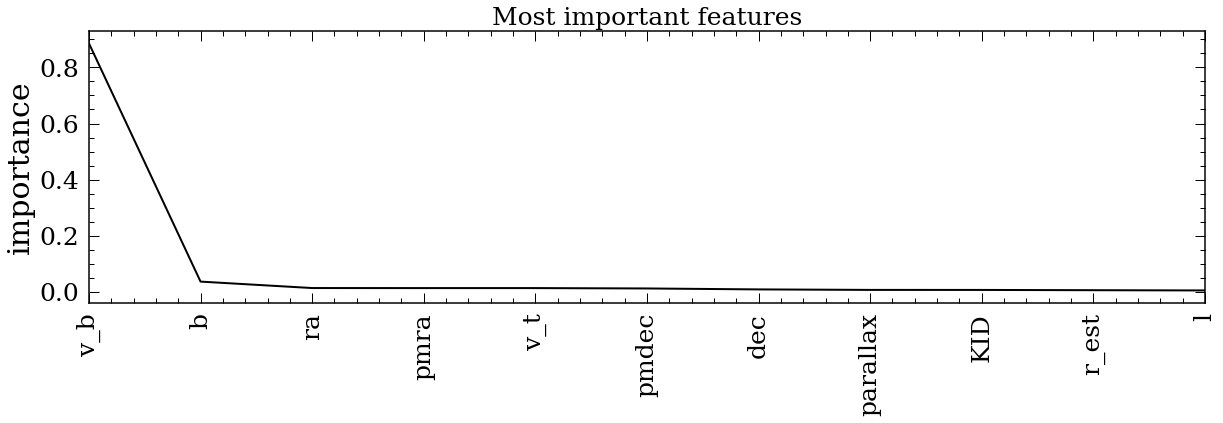

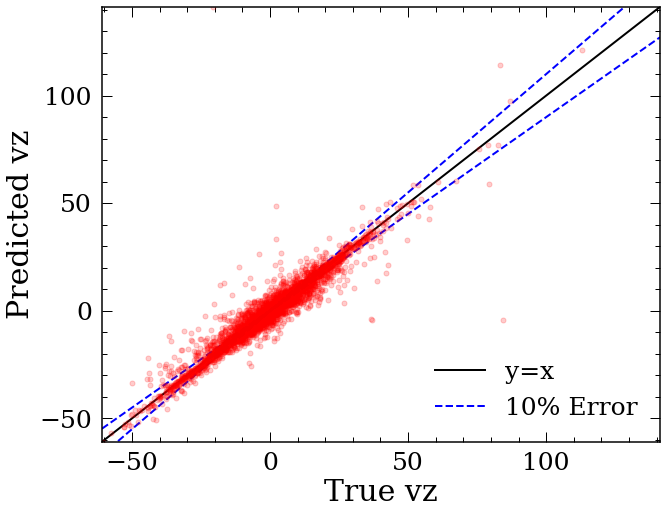

In [165]:
Astraea.plot_result(regr_outs['actrualF'], regr_outs['importance'], regr_outs['prediction'],
                    regr_outs['y_test'], labelName='vz', MS=10)

In [166]:
df_infervz['vz_astraea']=regr.predict(df_infervz[regr_outs['actrualF']].values)

/Users/lucy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Text(0, 0.5, 'vz inferred')

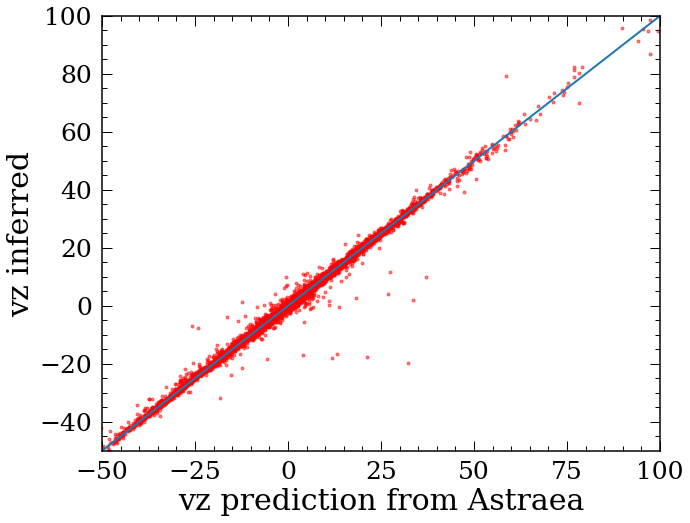

In [168]:
plt.figure(figsize=(10,8))
plt.plot(df_infervz['vz_astraea'],df_infervz['vz_inferred'],'r.',alpha=0.5)
plt.plot([-50,100],[-50,100])
plt.xlim([-50,100])
plt.ylim([-50,100])
plt.xlabel('vz prediction from Astraea')
plt.ylabel('vz inferred')

Text(0, 0.5, 'vb')

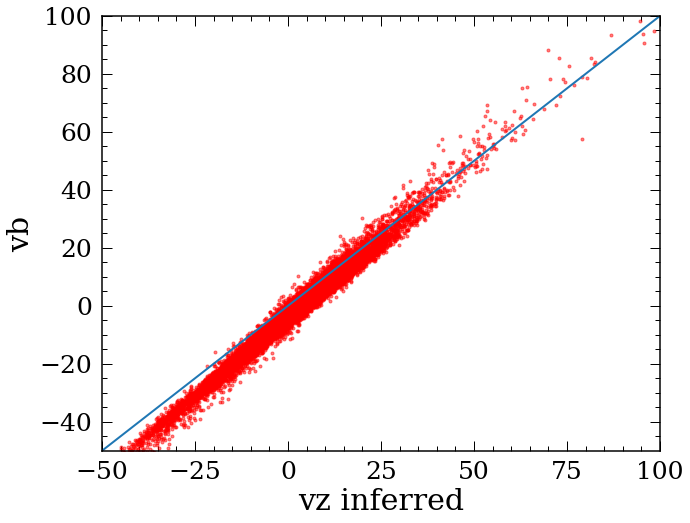

In [173]:
plt.figure(figsize=(10,8))
plt.plot(df_infervz['vz_inferred'],df_infervz['v_b'],'r.',alpha=0.5)
plt.plot([-50,100],[-50,100])
plt.xlim([-50,100])
plt.ylim([-50,100])
plt.xlabel('vz inferred')
plt.ylabel('vb')

In [169]:

df_all=pd.read_pickle('KinageAllKepler_cut.pkl')




In [170]:
df_all['vz']=regr.predict(df_all[regr_outs['actrualF']].values)

Text(0, 0.5, 'vb')

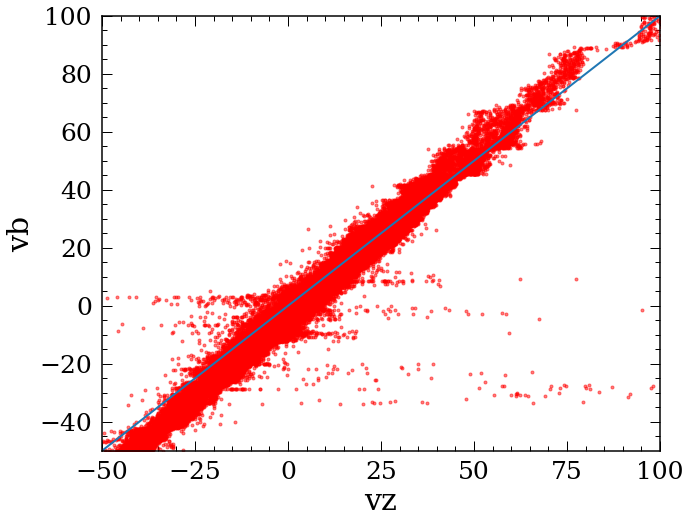

In [171]:
plt.figure(figsize=(10,8))
plt.plot(df_all['vz'],df_all['v_b'],'r.',alpha=0.5)
plt.plot([-50,100],[-50,100])
plt.xlim([-50,100])
plt.ylim([-50,100])
plt.xlabel('vz')
plt.ylabel('vb')